In [20]:
from google.colab import files
files.upload()





Saving House_Rent_Dataset.csv to House_Rent_Dataset (10).csv


{'House_Rent_Dataset (10).csv': b'Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact\r\n2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner\r\n2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner\r\n2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner\r\n2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner\r\n2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner\r\n2022-04-29,2,7000,600,Ground out of 1,Super Area,Thakurpukur,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner\r\n2022-06-21,2,10000,700,Ground out of 4,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,2,Contact Agent\r\n2022-06-21,1,5000,250,1

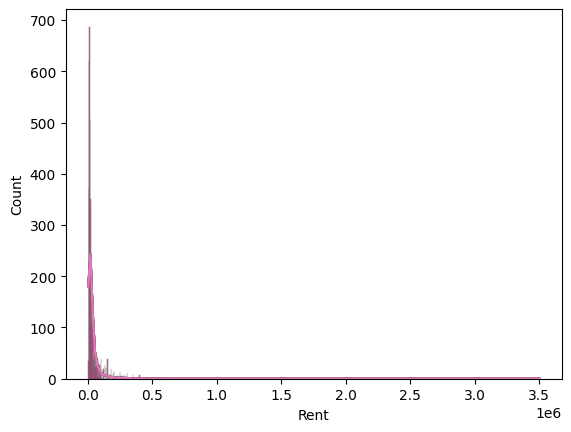

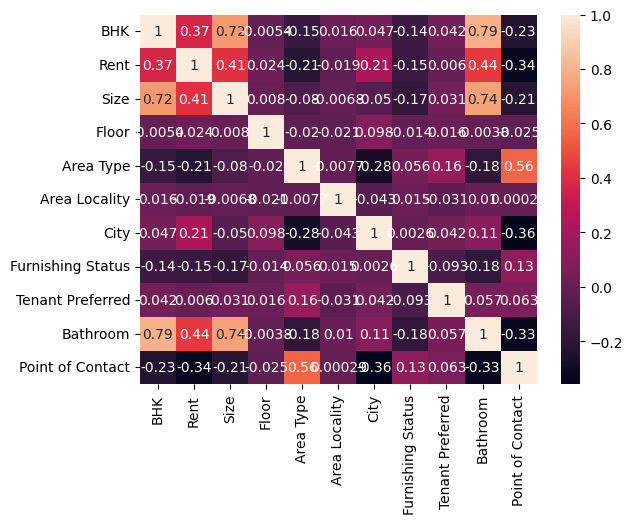

R2 Score: 0.4593449152469081


FileNotFoundError: Cannot find file: House_rent_predictor.ipynb

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

data = pd.read_csv("House_Rent_Dataset.csv")
data.head()
data.dropna(inplace=True)
data.drop(['Posted On'], axis=1, inplace=True)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in data.select_dtypes(include='object'):
    data[col] = le.fit_transform(data[col])
    sns.histplot(data['Rent'], kde=True)
plt.show()
sns.heatmap(data.corr(), annot=True)
plt.show()
from sklearn.model_selection import train_test_split

X = data.drop("Rent", axis=1)
y = data["Rent"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
from sklearn.metrics import r2_score

pred = model.predict(X_test)
print("R2 Score:", r2_score(y_test, pred))
import pickle
pickle.dump(model, open("rent_model.pkl", "wb"))
from google.colab import files








